In [1]:
import pandas as pd
import seaborn as sns

import random

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clrs
import matplotlib.cbook as cbook

from DBScan import DBScan

In [2]:
conjunto = pd.read_csv('dataset_processado.csv')
conjunto = conjunto.drop_duplicates(subset=['cases' , 'deaths'])
conjunto.sample(n=500)

,county,cases,deaths
7182,Contra Costa,61,1
42260,Suffolk,15844,328
39850,Columbiana,59,5
10937,Alameda,156,2
18188,McHenry,52,2
...,...,...,...
35964,New Haven,1468,41
31824,Bristol,601,5
11718,Ocean,222,5
25282,Erie,553,12


In [3]:
N = len(conjunto)
x = conjunto.cases.values
y = conjunto.deaths.values

print(N)
print(x.shape)
print(y.shape)

3563
(3563,)
(3563,)


In [4]:
coordenadas = [ [ x[i] , y[i] ] for i in range(len(x)) ]
conjunto['points'] = coordenadas

In [5]:
len(conjunto['points'])

3563

In [6]:
db_scan = DBScan(coordenadas)
labels = db_scan.make_clusters( min_points=2, eps=5)

In [7]:
coords = coordenadas

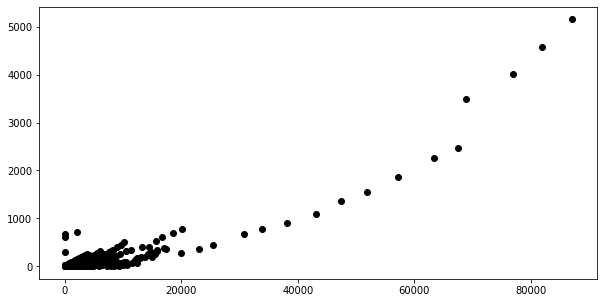

In [8]:
fig, ax = plt.subplots(figsize=( 10, 5 ))

for coordenada in conjunto['points']:
    x_c, y_c = coordenada
    plt.plot(x_c, y_c, 'o', color='black')

plt.show()

In [17]:
less1 = []
zero1 = []
one1  = []
for i in range( len(coords) ):
    x_c, y_c = coords[i]
    if (labels[i] == -1):
        less1.append([x_c, y_c])
    elif (labels[i] == 0):
        zero1.append([x_c, y_c])
    else:
        one1.append([x_c, y_c])
        

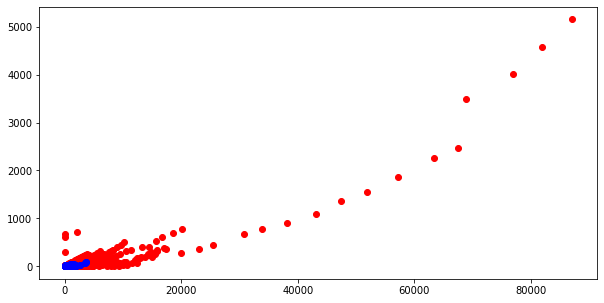

In [18]:
fig, ax = plt.subplots(figsize=( 10, 5 ))
[ plt.plot(c[0], c[1], 'o', color='red') for c in zero1 ]
[ plt.plot(c[0], c[1], 'o', color='blue') for c in one1 ]
[ plt.plot(c[0], c[1], 'o', color='black') for c in less1 ]

plt.show()

In [11]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=5, min_samples=2).fit( list(conjunto['points']) )
c_labels = clustering.labels_

In [21]:
less2 = []
zero2 = []
one2  = []
for i in range( len(coords) ):
    x_c, y_c = coords[i]
    if (c_labels[i] == -1):
        less2.append([x_c, y_c])
    elif (c_labels[i] == 0):
        zero2.append([x_c, y_c])
    else:
        one2.append([x_c, y_c])
        

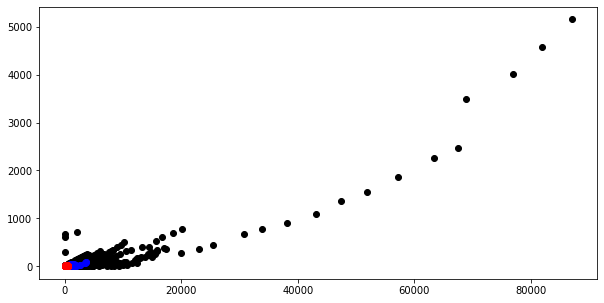

In [22]:
fig, ax = plt.subplots(figsize=( 10, 5 ))
[ plt.plot(c[0], c[1], 'o', color='black') for c in less2 ]
[ plt.plot(c[0], c[1], 'o', color='blue') for c in one2 ]
[ plt.plot(c[0], c[1], 'o', color='red') for c in zero2 ]

plt.show()